# Ensemble Methods I - Voting Classifiers
In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

## Loading Moons Dataset

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.15)

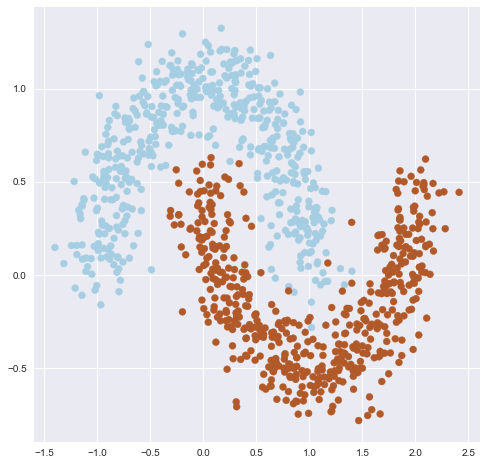

In [4]:
plt.figure(figsize=(8,8))

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)

## Examining Different Models on Training Set

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
log_clf = LogisticRegression()
# I impose a maximum depth otherwise the decision tree will fit perfectly and overtrain
dec_clf = DecisionTreeClassifier(max_depth=4)
# I get the SVC to calculate probabilities from 5-fold cross validation that will be used by the voting classifier
svm_clf = SVC(kernel='rbf',probability=True)
# I get the SVC to calculate probabilities from 5-fold cross validation that will be used by the voting classifier
rnd_clf = RandomForestClassifier(max_depth = 4)

In [20]:
voting_clf = VotingClassifier(
estimators = [('lr',log_clf), ('dt', dec_clf), ('svc', svm_clf), ('rf', rnd_clf)], voting='hard')
voting_clf.fit(X,y)

C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decision...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
for clf in ( log_clf, dec_clf, svm_clf, rnd_clf, voting_clf ):
    clf.fit(X,y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y,y_pred))

LogisticRegression 0.872
DecisionTreeClassifier 0.915
SVC 0.979
RandomForestClassifier 0.94
VotingClassifier 0.933


C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packag

## Splitting Into Train and Test Set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Hard Voting

In [24]:
for clf in ( log_clf, dec_clf, svm_clf, rnd_clf, voting_clf ):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.8566666666666667
DecisionTreeClassifier 0.8766666666666667
SVC 0.98
RandomForestClassifier 0.96
VotingClassifier 0.9333333333333333


C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avo

### Soft Voting

Choose outcome based on the highest weighted probability of being correct

In [30]:
voting_clf = VotingClassifier(
estimators = [('lr',log_clf), ('dec', dec_clf), ('svc', svm_clf), ('rf', rnd_clf)], voting='soft')
voting_clf.fit(X,y)

C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dec', Decisio...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [31]:
for clf in ( log_clf, rnd_clf, svm_clf, voting_clf ):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.8566666666666667
RandomForestClassifier 0.91
SVC 0.98
VotingClassifier 0.95


C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avo